### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [158]:
data = pd.read_csv('data/coupons.csv')

In [159]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [364]:
nan_count = data.isna().sum()
#determine any columns that have NaN entries and the number per column
print(nan_count)
print(data.info())
print(data['age'].unique())

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  -----

# Decisions based on nan values in each column
 After running the previous section i know will have issues with the 'car' column, so this column will be dropped entirely
  I also want to determine the unique values in 'bar' 'coffee house' and carry away columns, from this i nkow that the string values are mostly the same, so i can replace those with avg. values and keeping all nan values

3. Decide what to do about your missing data -- drop, replace, other...

In [276]:
df_2=data.drop(['car'],axis=1)

#replace all the Y column values with yes or no in a new column Y_str 
df_2['Y_str'] = df_2['Y'].astype(str)
df_2['Y_str'] = df_2['Y_str'].str.replace('0','No')
df_2['Y_str'] = df_2['Y_str'].str.replace('1','Yes')
df_2.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Y_str
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,1,Yes
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,0,0,0,1,0,No
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,1,Yes
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,No
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,NaN,4~8,1~3,1,1,0,0,1,0,No


4. What proportion of the total observations chose to accept the coupon? 



In [277]:
#create a bar graph of the people who accepted and those that didnt also display the actual quantity
proportion = str(df_2['Y'].sum()*100/len(df_2))
print("The proportion of yes is %" + proportion)


The proportion of yes is %56.84326710816777


5. Use a bar plot to visualize the `coupon` column.

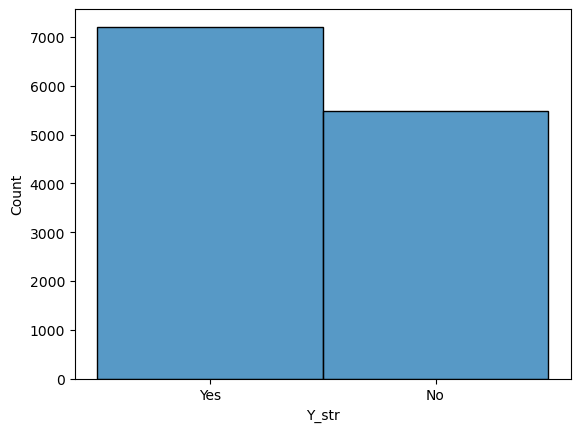

In [278]:
sns.histplot(df_2['Y_str'],bins=2)
px.histogram(df_2,x='Y_str')

6. Use a histogram to visualize the temperature column.

<Axes: xlabel='temperature', ylabel='Count'>

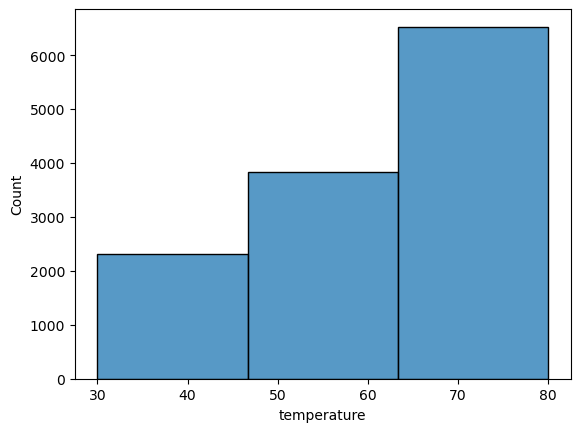

In [95]:
sns.histplot(df_2['temperature'],bins=3)


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [279]:
df_bar = data.loc[data['coupon']=='Bar'] #filter the data frame for only bar coupons and display the first five rows of the new DF
df_bar = df_bar.reset_index()
df_bar['Y_str'] = df_bar['Y'].astype(str).replace('0','No').replace('1','Yes')
df_bar.head()

,index,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,Y_str
0,9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,...,NaN,4~8,1~3,1,1,0,0,1,0,No
1,13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,...,NaN,4~8,1~3,1,0,0,1,0,1,Yes
2,17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,...,NaN,4~8,1~3,1,1,1,0,1,0,No
3,24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,...,4~8,4~8,less1,1,0,0,0,1,1,Yes
4,35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,...,4~8,4~8,less1,1,0,0,1,0,1,Yes


2. What proportion of bar coupons were accepted?


In [280]:
proportion = str(df_bar['Y'].sum()*100/len(df_bar))
print("The proportion of yes is %" + proportion)


The proportion of yes is %41.00148735746158


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [281]:
#filter the data into two groups, those more than 3 and those less than 3
data_1 = data.copy() #create a new dataframe to work with for this question
import plotly.express as px

data_1.loc[(data_1['Bar'] == "never") | (data_1['Bar'] == "less1") | (data_1['Bar'] == "1~3"), 'Bar'] = "<3"
data_1.loc[(data_1['Bar'] == "gt8") | (data_1['Bar'] == "4~8"), 'Bar'] = ">3"
#unique values in the df are "'never' 'less1' '1~3' 'gt8' nan '4~8'"

fig =px.histogram(data_1,x='Bar',color='Y') #quick plot for sanity check of data accuracy
fig.show()
#determining the amount who said yes for the group of less than 3 times a month
less_3 = len(data_1.query("Bar=='<3' and Y == 1"))/len(data_1.query("Bar=='<3' and Y == 0")) #determine the number of by length of filtered dataframe
print("The proportion of people who go out 3 times or less a month and said yes to the coupons is ",less_3) #display calculated value in easy format

more_3 = len(data_1.query("Bar=='>3' and Y == 1"))/len(data_1.query("Bar=='>3' and Y == 0"))
print("The proportion of people who go out more than 3 times a month and said yes to the coupons is ",more_3)

The proportion of people who go out 3 times or less a month and said yes to the coupons is  1.2833742833742834
The proportion of people who go out more than 3 times a month and said yes to the coupons is  1.6486988847583643


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [283]:
#filter the data according to more than once a month and over 25 compared to total including NaN values
data_1 = data.copy() #create a new dataframe to work with for this question

data_1.loc[(data_1['Bar'] == "never") | (data_1['Bar'] == "less1"), 'Bar'] = "<1"
data_1.loc[(data_1['Bar'] == "gt8") | (data_1['Bar'] == "4~8")| (data_1['Bar'] == "1~3"), 'Bar'] = ">1"
px.histogram(data_1,x='age',color='Bar') #quick plot for a sanity check of the data
 
    #finding the proportion of people with the criteria vs total amount of people
    #getting rid of any values that cannot be changed to int type input

data_1['age'] = data_1['age'].str.replace('50plus','50').replace('below21','20')
    #first changing the data types for age from string to int 
data_1['age'] = data_1['age'].astype(int)
aged_party_people = ((len(data_1.query("Bar== '>1' & age >=25"))/len(data_1))*100)
print("The percentage of people who said yes to the coupon and were above 25 and go to bars more than once a month is %",aged_party_people)

The percentage of people who said yes to the coupon and were above 25 and go to bars more than once a month is % 21.893724377168088


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [284]:
#criteria is for drivers who go to bars more than once a month and had passengers that werent children and didnt fish farm or cut trees
data_1 = []
data_1 = data.copy()  #create a copy of the data frame for use in this question
#change the frequency of bar visits for easier computation (also because i am inadequate)
data_1.loc[(data_1['Bar'] == "never") | (data_1['Bar'] == "less1"), 'Bar'] = "<1"
data_1.loc[(data_1['Bar'] == "gt8") | (data_1['Bar'] == "4~8")| (data_1['Bar'] == "1~3"), 'Bar'] = ">1"

data_filtered = data_1.loc[(data_1['Bar']==">1")&(data_1['passanger']!= "Kid(s)")&(data_1['occupation']!= "Farming Fishing & Forestry")]
#creting a new dataframe with the specified criteria and comparing this to the previously created dataframe
proportion = 100* len(data_filtered)/len(data_1)
print("The percentage of people in the above criteria is %",proportion)

The percentage of people in the above criteria is % 29.13907284768212


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [272]:
#initialize the dataframe to use in this calculation
data_1 = []
data_1 = data.copy()
#change the frequency of bar visits for easier computation (also because i am inadequate)
data_1.loc[(data_1['Bar'] == "never") | (data_1['Bar'] == "less1"), 'Bar'] = "<1"
data_1.loc[(data_1['Bar'] == "gt8") | (data_1['Bar'] == "4~8")| (data_1['Bar'] == "1~3"), 'Bar'] = ">1"
#filter according to the first set of criteria and store as a df for later computation
#all the criteria in a single filter using AND and OR statements
crit_1 = data_1.loc[
    (((data_1['Bar'] == ">1") & (data_1['passanger'] != "Kid(s)") & (data_1['maritalStatus'] != "Widowed")&(data_1['Y']==1)) |
     ((data_1['Bar'] == ">1") & (data_1['age'].isin(['21', '26', 'below21']))&(data_1['Y']==1)) |
     ((data_1['Y']==1)&(data_1['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (data_1['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999']))))
]
#only the first list of criteria
crit_2 = data_1.loc[
    ((data_1['Bar'] == ">1") & (data_1['passanger'] != "Kid(s)") & (data_1['maritalStatus'] != "Widowed")&(data_1['Y']==1))]
#only the second set of criteria
crit_3 = data_1.loc[
     ((data_1['Bar'] == ">1") & (data_1['age'].isin(['21', '26', 'below21']))&(data_1['Y']==1)) 
]
#only the third set of criteria
crit_4 = data_1.loc[
     ((data_1['Y']==1)&(data_1['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (data_1['income']
                                                               .isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])))
]

#displahying the quantities of the different criteria if they said yes
crit1_proportion_to_population = 100* len(crit_1)/len(data_1)
crit2_proportion_to_population = 100* len(crit_2)/len(data_1)
crit3_proportion_to_population = 100* len(crit_3)/len(data_1)
crit4_proportion_to_population = 100* len(crit_4)/len(data_1)
print("of the total list of criteria the percentage who said yes is %",crit1_proportion_to_population)
print("of the first set of criteria the percentage who said yes is %",crit2_proportion_to_population)
print("of the second set of criteria the percentage who said yes is %",crit3_proportion_to_population)
print("of the third set of criteria the percentage who said yes is %",crit4_proportion_to_population)

of the total list of criteria the percentage who said yes is % 24.590034689372438
of the first set of criteria the percentage who said yes is % 18.15673289183223
of the second set of criteria the percentage who said yes is % 11.250394197414066
of the third set of criteria the percentage who said yes is % 10.793125197098707


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

# Observations about the drivers that accepted the coupon
Based on the previous criteria for drivers who accepted the coupons i can be seen that approximately a quarter of the drivers who fall under any of the sets of criteria,
further since the sum of the individual sets of criteria does not equal the value given by the "crit1_proportion_to_population"
i know that these different criteria are not exclusive, meaning that some of the criteria may overlap.
However looking at this data i can hypothesize that of all the people that said yes to the coupons (%56) that approximately half satisfy the criteria and from the previous questions i can tell that the individuals who responded yes the most did not have children in the car at the time as compared to the other groups with an increase of approximately %7 for this criteria.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

# I want to explore the types of customers who said yes to the coffee house coupons that were displayed to them.
1. create new data frame that only looks for values of the coupon for coffee house.
2. determine what proportion of individuals said yes to this coupon from the total set of people in the data
3. determine if time of day had an influence on the choice of the individuals to go to the coffee house or not
4. determine if the location of trip had an influence on the acceptance of the coupon or not.
5. determine if age combined with regularity of coffee house visits showed a correlation to coupon acceptance
6. determine what proportion of marreid vs single people under the age of 30 said yes to the coupons compared to the sample set

In [305]:
data.info() 
#display the original dataframe information for column names and data types

print(data['coupon'].unique())
#determine the unique values for the coupon type column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

The percentage of people who accepted the coffee coupons is: % 49.92492492492492


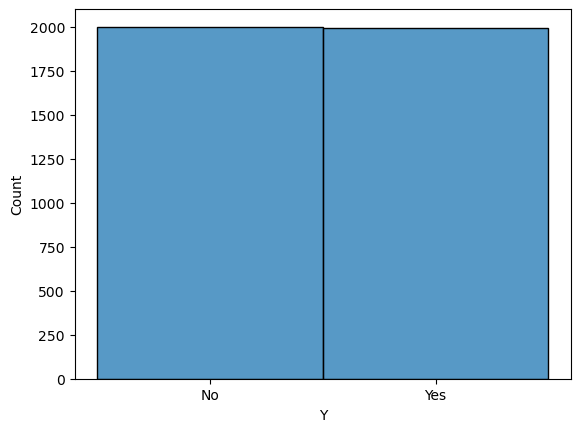

In [306]:
#create a new data frame that only includes the coffehouse coupon type
df_coff = data.loc[data['coupon']=='Coffee House']
#plot the proportion of people who said yes vs no in a histogram for this data
sns.histplot(df_coff,x='Y',discrete=True)
plt.xticks([0, 1], ['No', 'Yes'])

#determine the proportion of indivuduals who said yes vs no to the coffee coupon
prop_yes = 100*len(df_coff.loc[df_coff['Y']==1])/len(df_coff)
print('The percentage of people who accepted the coffee coupons is: %',prop_yes)

# Looking at the previous plot and the printed output of the counts i can tell that approximately half of all drivers accepted the coffee house coupons on their trips. 
Next i want to see how the time on the road affect the outcome of whether the drivers accepted the coupons or not.

In [322]:
#creating a historgram of the times that people decided to go the coffee houses for the different accepatnce rates
#setting the order of the categories i want to see (times) since they are strings and not correectly ordered
cat=['7AM','10AM','2PM','6PM','10PM']
fig = px.histogram(df_coff,x='time',category_orders={'time': cat},color='Y',barmode='overlay')
fig.show()

# Observing trends from previous plot by various times
As the histogram shows, acceptance rates proportions were higher for time periods between 10AM and 2PM, however the increased quantities of coupons counted fo the 7AM and 6PM slot yielded a similar quantity of total acceptance despite a lowered proportion of "yes" to "no" for coupon acceptance.

# The next step is to determine whether the destination of the trip had an impact on the acceptance of the coupon or not.


In [325]:
#create a plot showing the acceptance rates for the coffee house coupons dependant on trip desitnation
fig = px.histogram(df_coff,x='destination',color='Y',barmode='overlay')
fig.show()


# From the previous plot i would like to know the differences in values for the different proportions of acceptance of the coupons as percentage values.

In [343]:
coff_prop_1 = 100*(len(df_coff.loc[(df_coff['destination']=='No Urgent Place')& (df_coff['Y']==1)]))/len(df_coff.loc[df_coff['destination']=='No Urgent Place'])
coff_prop_2 = 100*(len(df_coff.loc[(df_coff['destination']=='Home')& (df_coff['Y']==1)]))/len(df_coff.loc[df_coff['destination']=='Home'])
coff_prop_3 = 100*(len(df_coff.loc[(df_coff['destination']=='Work')& (df_coff['Y']==1)]))/len(df_coff.loc[df_coff['destination']=='Work'])

print("Of the people heading to No urgent place, %",coff_prop_1," said yes.")
print("Of the people heading Home, %",coff_prop_2," said yes.")
print("Of the people heading to Work, %",coff_prop_3," said yes.")

Of the people heading to No urgent place, % 58.09744779582367  said yes.
Of the people heading Home, % 36.206896551724135  said yes.
Of the people heading to Work, % 44.57831325301205  said yes.


# Looking at this data i can tell that it is best to target the coupons for individuals who are either going nowhere urgent or to indviduals who are going to work.
It appears that individuals who are going home showed mauch lower tendencies towards wanting to buy coffee at a coffee house using the cuopons, probably because they have coffee at home.


In [347]:
#next i want to determine graphically how the time of day and location together influence
#the decision of people to use their coupons or not for the coffee house

#i can use a seaborn jointplot in order to display this value graphically
#sns.jointplot(df_coff,x='time',y='destination',kind='hist')
df_coff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 1 to 12681
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           3996 non-null   object
 1   passanger             3996 non-null   object
 2   weather               3996 non-null   object
 3   temperature           3996 non-null   int64 
 4   time                  3996 non-null   object
 5   coupon                3996 non-null   object
 6   expiration            3996 non-null   object
 7   gender                3996 non-null   object
 8   age                   3996 non-null   object
 9   maritalStatus         3996 non-null   object
 10  has_children          3996 non-null   int64 
 11  education             3996 non-null   object
 12  occupation            3996 non-null   object
 13  income                3996 non-null   object
 14  car                   37 non-null     object
 15  Bar                   3959 non-null  

# Since there is minimal correlation between these two variables i may want to do some digging on the relationships between columns of my choice.

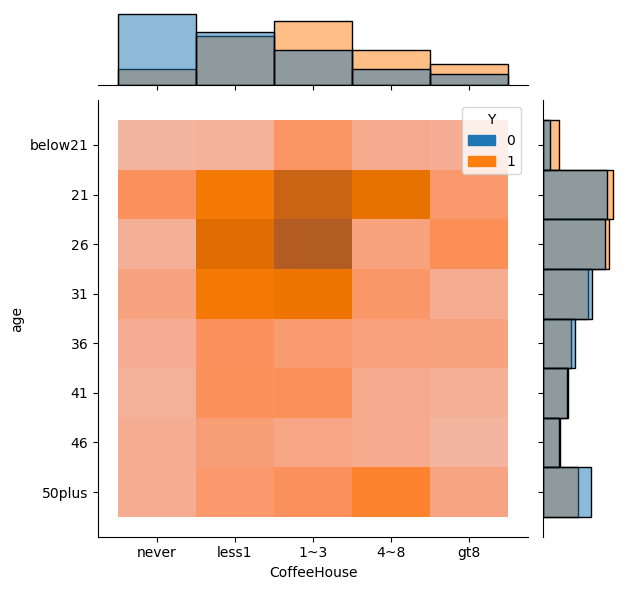

In [362]:
#dropping columns that i dont want to explore 
df_coff_trim = df_coff.drop(columns=['car','Bar','CarryAway','RestaurantLessThan20','Restaurant20To50','toCoupon_GEQ5min','toCoupon_GEQ15min','toCoupon_GEQ25min'])
#ordering the two categories for age and for number of times at coffee house to observe the distrubtion shapes

num_visits = ['never','less1','1~3','4~8','gt8']  #placing in orer from least to greatest
age_cats = ['below21','21','26','31','36','41','46','50plus'] #placing in order from least to greatest

# Reorder the categories in the dataframe
df_coff_trim['CoffeeHouse'] = pd.Categorical(df_coff_trim['CoffeeHouse'], categories=num_visits, ordered=True)
df_coff_trim['age'] = pd.Categorical(df_coff_trim['age'], categories=age_cats, ordered=True)

#plotting the relationship between regularity of coffee shop visits, age and coupon acceptance.
sns.jointplot(df_coff_trim,x='CoffeeHouse',y='age',hue='Y',kind='hist')

# Observing the ordered data on this graph would indicate that a good target group is 21 to 26 year olds who visit coffee houses 1 to 3 times in a month, further expanding on this it would be good to target ages 21-31 who visit coffee houses between 1 and 8 times a month.
This data may however be a bit biased as this also indicates that the number of respondants diminishes as age increases as shown by the skewed distribution of  histogram plot of the ages, since the histogram displays total counts for this category the dame quantity of46 years old individual was not sampled as mush as the 21 to 26 year old groups.
It also appears that the distribution of people who visited coffee houses is normally distributed around 1-3. 

The percentage of single people who said yes to coffee under the age of 31 is: % 53.25443786982248
The percentage of married people who said yes to coffee under the age of 31 is: % 52.90148448043185


C:\Users\User\AppData\Local\Temp\ipykernel_3852\3535536143.py:25: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



([0, 1, 2, 3, 4],
 [Text(0, 0, 'Unmarried partner'),
  Text(1, 0, 'Single'),
  Text(2, 0, 'Married partner'),
  Text(3, 0, 'Divorced'),
  Text(4, 0, 'Widowed')])

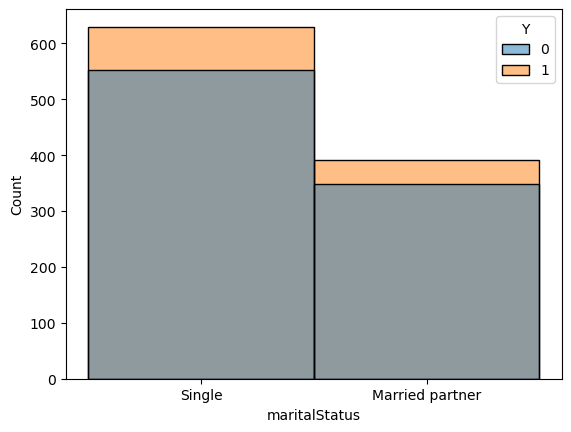

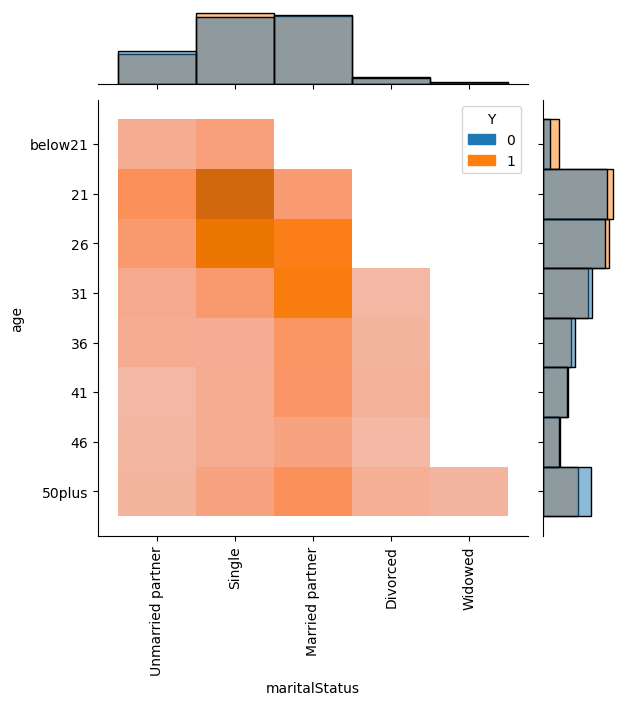

In [391]:
#detrmining the proportion of individuals who are under the age of 31 and said yes to the coupons and are either married or single
#first creating a new data frame to make plotting this information simplified
#unique values in married column are:'Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed'
#unique value in age are : '21' '46' '26' '31' '41' '50plus' '36' 'below21'
df_coff_2 = df_coff.loc[(((df_coff['maritalStatus']=='Single')|(df_coff['maritalStatus']=='Married partner'))&
                         ((df_coff['age']=='below21')|(df_coff['age']=='21')|(df_coff['age']=='26')|(df_coff['age']=='31')))
                       ]
#determine and display the percentage of yes to total for the decided categories.
coff_prop_sing = 100* len(df_coff_2.query('maritalStatus == "Single" and Y == 1'))/len(df_coff_2.query('maritalStatus == "Single"'))
print("The percentage of single people who said yes to coffee under the age of 31 is: %",coff_prop_sing)

#determine and display the percentage of yes to total for the decided category
coff_prop_marr = 100* len(df_coff_2.query('maritalStatus == "Married partner" and Y == 1'))/len(df_coff_2.query('maritalStatus == "Married partner"'))
print("The percentage of married people who said yes to coffee under the age of 31 is: %",coff_prop_marr)

#plotting on a histogram the yes and no responses for this subset of the data
plot_1 = sns.histplot(df_coff_2,x='maritalStatus',hue='Y')


#creating a jointplot for all the data by age as well as marital status
#first creating a list to order the age by
age_cats = ['below21','21','26','31','36','41','46','50plus'] #placing in order from least to greatest

#ordering the data frame accordingly
df_coff['age'] = pd.Categorical(df_coff['age'], categories=age_cats, ordered=True)

sns.jointplot(df_coff,x='maritalStatus',y='age',kind='hist',hue='Y')
plt.xticks(rotation=90)

# Observations on age and marital status of cffee house visitors
From the previous plots it can be seen that the distribution of individual who said yes to the coffee house coupons remained relatively unaffected by the marital status of the individuals since the percentage of yes to total remained approximately %50 irrespective of marital status.